# Imports

In [218]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [219]:
year = 2022
gp_round = 7
ses = 'R'

In [220]:
driver_1 = 'VER'
driver_2 = 'LEC'

In [221]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']


In [222]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True
8,7,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True
10,9,Canada,Montréal,FORMULA 1 GRAND PRIX DU CANADA 2022,2022-06-19 16:00:00,Canadian Grand Prix,conventional,Practice 1,2022-06-17 14:00:00,Practice 2,2022-06-17 17:00:00,Practice 3,2022-06-18 13:00:00,Qualifying,2022-06-18 16:00:00,Race,2022-06-19 14:00:00,True
11,10,Great Britain,Silverstone,FORMULA 1 BRITISH GRAND PRIX 2022,2022-07-03 17:00:00,British Grand Prix,conventional,Practice 1,2022-07-01 13:00:00,Practice 2,2022-07-01 16:00:00,Practice 3,2022-07-02 12:00:00,Qualifying,2022-07-02 15:00:00,Race,2022-07-03 15:00:00,True


In [223]:
results = session.results

In [224]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-29 15:49:07.160,0 days 03:48:07.139000,,1239.523611,0 days 00:00:00,10590,263,7,99,False,0,interpolation,0.045484,0.000014,OnTrack,-7663,-6592,501
3,2022-05-29 15:49:07.262,0 days 03:48:07.241000,,1239.523611,0 days 00:00:00.102000,10623,264,7,99,False,0,pos,7.568103,0.002302,OnTrack,-7669,-6505,502
4,2022-05-29 15:49:07.465,0 days 03:48:07.444000,,1239.523611,0 days 00:00:00.305000,10688,266,7,99,False,0,car,22.597222,0.006874,OnTrack,-7678,-6270,502
5,2022-05-29 15:49:07.542,0 days 03:48:07.521000,,1239.523611,0 days 00:00:00.382000,10722,267,7,99,False,0,pos,28.318026,0.008615,OnTrack,-7680,-6195,503
6,2022-05-29 15:49:07.665,0 days 03:48:07.644000,63,1239.523611,0 days 00:00:00.505000,10756,268,7,99,False,0,car,37.486111,0.011404,OnTrack,-7679,-6114,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2022-05-29 15:50:21.506,0 days 03:49:21.485000,63,1226.795278,0 days 00:01:14.346000,10421,259,6,100,False,0,car,3249.105000,0.988423,OnTrack,-7648,-6830,501
575,2022-05-29 15:50:21.622,0 days 03:49:21.601000,63,1221.461944,0 days 00:01:14.462000,10431,260,6,100,False,0,pos,3257.499436,0.990977,OnTrack,-7654,-6743,502
576,2022-05-29 15:50:21.706,0 days 03:49:21.685000,63,1216.128611,0 days 00:01:14.546000,10442,261,7,100,False,0,car,3263.605000,0.992834,OnTrack,-7657,-6681,501
577,2022-05-29 15:50:21.842,0 days 03:49:21.821000,63,1216.128611,0 days 00:01:14.682000,10481,262,7,100,False,0,pos,3273.558779,0.995862,OnTrack,-7664,-6584,502


In [225]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:03.938000,24.2,68.0,1002.9,False,42.1,70,0.8
1,0 days 00:01:03.941000,24.2,68.0,1002.7,False,41.5,346,0.8
2,0 days 00:02:03.935000,24.2,68.0,1002.9,False,41.5,335,2.4
3,0 days 00:03:03.939000,24.1,68.0,1002.9,False,41.3,320,0.6
4,0 days 00:04:03.938000,24.2,69.0,1002.9,False,41.2,51,0.6
...,...,...,...,...,...,...,...,...
240,0 days 04:00:04.543000,22.3,65.0,1003.4,False,29.5,166,1.0
241,0 days 04:01:04.560000,22.4,65.0,1003.2,False,29.9,165,1.1
242,0 days 04:02:04.561000,22.4,66.0,1003.2,False,29.8,142,0.6
243,0 days 04:03:04.570000,22.5,66.0,1003.2,False,30.1,0,0.6


In [226]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [227]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [228]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [229]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2} - Fastest Lap"

In [230]:
ref_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2022-05-29 15:38:10.734,0 days 03:37:10.713000,10818,262,6,100,False,0,interpolation,0 days 00:00:00,0.000000
1,2022-05-29 15:38:10.944,0 days 03:37:10.923000,10665,264,7,100,False,0,car,0 days 00:00:00.210000,15.400000
2,2022-05-29 15:38:11.144,0 days 03:37:11.123000,10497,268,7,100,False,0,car,0 days 00:00:00.410000,30.288889
3,2022-05-29 15:38:11.304,0 days 03:37:11.283000,10497,267,7,12,False,0,car,0 days 00:00:00.570000,42.155556
4,2022-05-29 15:38:11.544,0 days 03:37:11.523000,10296,265,7,0,False,0,car,0 days 00:00:00.810000,59.822222
...,...,...,...,...,...,...,...,...,...,...,...
283,2022-05-29 15:39:25.624,0 days 03:38:25.603000,11122,247,6,100,False,0,car,0 days 00:01:14.890000,3192.975278
284,2022-05-29 15:39:25.824,0 days 03:38:25.803000,11255,248,6,100,False,0,car,0 days 00:01:15.090000,3206.753056
285,2022-05-29 15:39:26.144,0 days 03:38:26.123000,11333,254,6,100,False,0,car,0 days 00:01:15.410000,3229.330833
286,2022-05-29 15:39:26.464,0 days 03:38:26.443000,11646,259,6,100,False,0,car,0 days 00:01:15.730000,3252.353056


In [231]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [232]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.5)
fig.show()

In [233]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
34,0 days 03:22:58.650000,11,0 days 00:01:19.801000,35,6,NaT,NaT,0 days 00:00:21.212000,0 days 00:00:37.215000,0 days 00:00:21.374000,0 days 03:22:00.061000,0 days 03:22:37.276000,0 days 03:22:58.650000,NaN,176.0,254.0,273.0,False,MEDIUM,5.0,True,0 days 03:21:38.849000,Red Bull Racing,PER,1,True,2022-05-29 15:22:38.870
35,0 days 03:24:17.677000,11,0 days 00:01:19.027000,36,6,NaT,NaT,0 days 00:00:20.948000,0 days 00:00:36.980000,0 days 00:00:21.099000,0 days 03:23:19.598000,0 days 03:23:56.578000,0 days 03:24:17.677000,187.0,182.0,254.0,273.0,False,MEDIUM,6.0,True,0 days 03:22:58.650000,Red Bull Racing,PER,1,True,2022-05-29 15:23:58.671
36,0 days 03:25:36.024000,11,0 days 00:01:18.347000,37,6,NaT,NaT,0 days 00:00:21.061000,0 days 00:00:36.517000,0 days 00:00:20.769000,0 days 03:24:38.738000,0 days 03:25:15.255000,0 days 03:25:36.024000,193.0,186.0,255.0,274.0,False,MEDIUM,7.0,True,0 days 03:24:17.677000,Red Bull Racing,PER,1,True,2022-05-29 15:25:17.698
37,0 days 03:26:53.105000,11,0 days 00:01:17.081000,38,6,NaT,NaT,0 days 00:00:20.555000,0 days 00:00:36.085000,0 days 00:00:20.441000,0 days 03:25:56.579000,0 days 03:26:32.664000,0 days 03:26:53.105000,195.0,189.0,255.0,274.0,False,MEDIUM,8.0,True,0 days 03:25:36.024000,Red Bull Racing,PER,1,True,2022-05-29 15:26:36.045
38,0 days 03:28:10.248000,11,0 days 00:01:17.143000,39,6,NaT,NaT,0 days 00:00:20.724000,0 days 00:00:35.938000,0 days 00:00:20.481000,0 days 03:27:13.829000,0 days 03:27:49.767000,0 days 03:28:10.248000,199.0,189.0,256.0,275.0,False,MEDIUM,9.0,True,0 days 03:26:53.105000,Red Bull Racing,PER,1,True,2022-05-29 15:27:53.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,0 days 03:35:26.516000,23,0 days 00:01:19.296000,44,6,NaT,NaT,0 days 00:00:20.975000,0 days 00:00:37.173000,0 days 00:00:21.148000,0 days 03:34:28.195000,0 days 03:35:05.368000,0 days 03:35:26.516000,181.0,182.0,262.0,285.0,False,MEDIUM,22.0,False,0 days 03:34:07.220000,Williams,ALB,1,True,2022-05-29 15:35:07.241
1129,0 days 03:36:45.555000,23,0 days 00:01:19.039000,45,6,NaT,NaT,0 days 00:00:20.971000,0 days 00:00:37.047000,0 days 00:00:21.021000,0 days 03:35:47.487000,0 days 03:36:24.534000,0 days 03:36:45.555000,179.0,181.0,263.0,287.0,False,MEDIUM,23.0,False,0 days 03:35:26.516000,Williams,ALB,1,True,2022-05-29 15:36:26.537
1130,0 days 03:38:04.797000,23,0 days 00:01:19.242000,46,6,NaT,NaT,0 days 00:00:20.982000,0 days 00:00:36.966000,0 days 00:00:21.294000,0 days 03:37:06.537000,0 days 03:37:43.503000,0 days 03:38:04.797000,183.0,182.0,270.0,284.0,False,MEDIUM,24.0,False,0 days 03:36:45.555000,Williams,ALB,1,True,2022-05-29 15:37:45.576
1131,0 days 03:39:24.305000,23,0 days 00:01:19.508000,47,6,NaT,NaT,0 days 00:00:21.200000,0 days 00:00:37.043000,0 days 00:00:21.265000,0 days 03:38:25.997000,0 days 03:39:03.040000,0 days 03:39:24.305000,182.0,183.0,268.0,284.0,False,MEDIUM,25.0,False,0 days 03:38:04.797000,Williams,ALB,1,True,2022-05-29 15:39:04.818


In [234]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [235]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [236]:
colormap_speed = mpl.cm.get_cmap('RdYlGn')
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_2['X'], lap_2['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [237]:
start_x

-7667

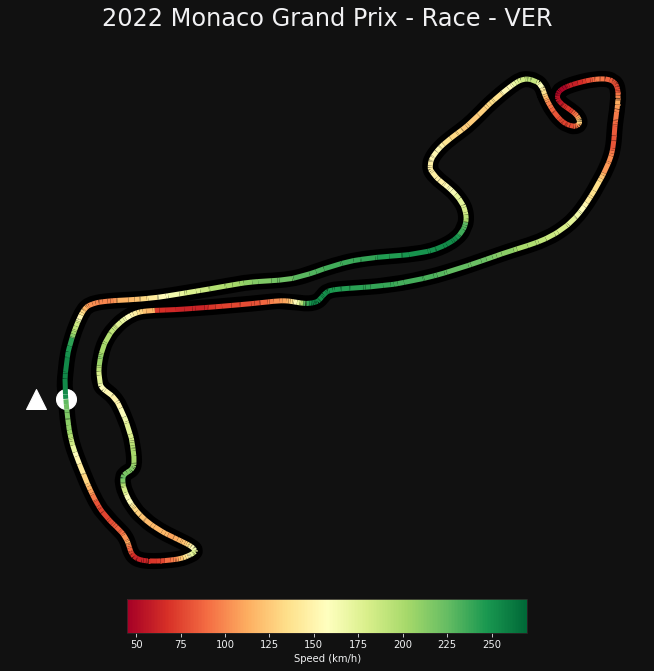

In [238]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 680*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_2['Speed'].min(), lap_2['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

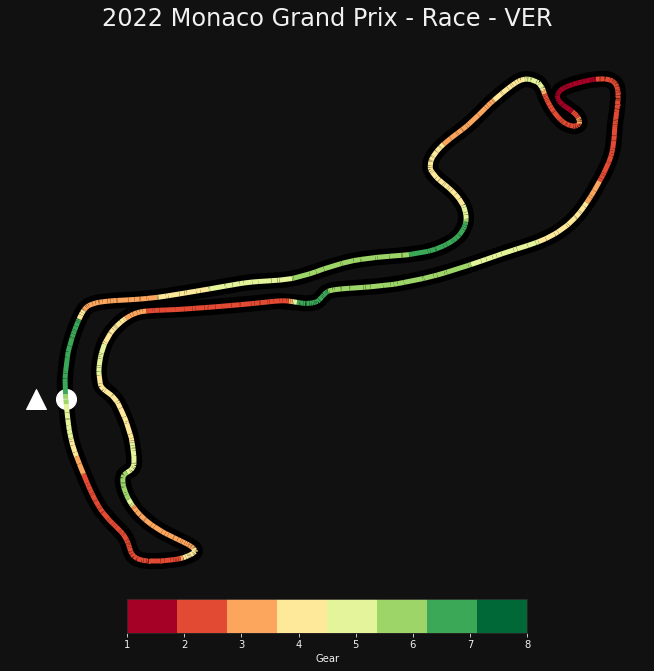

In [239]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 680*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [240]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

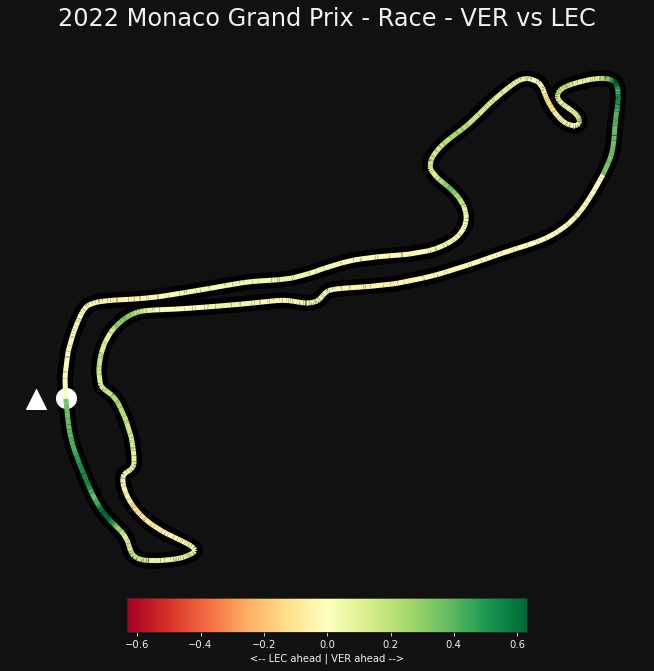

In [241]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 680*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_2['X'], lap_2['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [242]:
race = session.laps
race.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1179 non-null   timedelta64[ns]
 1   DriverNumber        1179 non-null   object         
 2   LapTime             1133 non-null   timedelta64[ns]
 3   LapNumber           1179 non-null   int64          
 4   Stint               1179 non-null   int64          
 5   PitOutTime          73 non-null     timedelta64[ns]
 6   PitInTime           73 non-null     timedelta64[ns]
 7   Sector1Time         1158 non-null   timedelta64[ns]
 8   Sector2Time         1178 non-null   timedelta64[ns]
 9   Sector3Time         1158 non-null   timedelta64[ns]
 10  Sector1SessionTime  1158 non-null   timedelta64[ns]
 11  Sector2SessionTime  1178 non-null   timedelta64[ns]
 12  Sector3SessionTime  1158 non-null   timedelta64[ns]
 13  SpeedI1             1107 non-null   float64 

In [243]:
race = race.sort_values('Time').reset_index(drop=True)
race.head(15)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 02:06:32.425000,16,NaT,1,3,0 days 02:04:10.602000,0 days 02:04:09.591000,NaT,0 days 00:01:01.525000,0 days 00:00:35.658000,NaT,0 days 02:05:56.825000,0 days 02:06:32.478000,99.0,103.0,147.0,109.0,False,WET,1.0,True,0 days 02:04:00.206000,Ferrari,LEC,2,False,2022-05-29 14:05:00.227
1,0 days 02:06:34.027000,55,NaT,1,3,0 days 02:04:13.515000,0 days 02:04:12.295000,NaT,0 days 00:01:00.873000,0 days 00:00:35.824000,NaT,0 days 02:05:58.262000,0 days 02:06:34.110000,114.0,113.0,150.0,92.0,False,WET,1.0,True,0 days 02:04:00.206000,Ferrari,SAI,2,False,2022-05-29 14:05:00.227
2,0 days 02:06:35.799000,11,NaT,1,3,0 days 02:04:16.197000,0 days 02:04:15.170000,NaT,0 days 00:01:02.877000,0 days 00:00:34.691000,NaT,0 days 02:06:01.175000,0 days 02:06:35.807000,105.0,123.0,159.0,136.0,False,WET,1.0,False,0 days 02:04:00.206000,Red Bull Racing,PER,2,False,2022-05-29 14:05:00.227
3,0 days 02:06:37.010000,1,NaT,1,3,0 days 02:04:19.299000,0 days 02:04:18.366000,NaT,0 days 00:01:04.033000,0 days 00:00:32.861000,NaT,0 days 02:06:04.227000,0 days 02:06:37.061000,107.0,123.0,149.0,197.0,False,WET,1.0,False,0 days 02:04:00.206000,Red Bull Racing,VER,2,False,2022-05-29 14:05:00.227
4,0 days 02:06:39.720000,4,NaT,1,3,0 days 02:04:23.693000,0 days 02:04:22.950000,NaT,0 days 00:01:04.895000,0 days 00:00:32.631000,NaT,0 days 02:06:07.174000,0 days 02:06:39.777000,118.0,126.0,187.0,184.0,False,WET,1.0,True,0 days 02:04:00.206000,McLaren,NOR,2,False,2022-05-29 14:05:00.227
5,0 days 02:06:41.574000,63,NaT,1,3,0 days 02:04:29.643000,0 days 02:04:29.119000,NaT,0 days 00:01:03.146000,0 days 00:00:31.942000,NaT,0 days 02:06:09.733000,0 days 02:06:41.583000,115.0,120.0,147.0,154.0,False,WET,1.0,False,0 days 02:04:00.206000,Mercedes,RUS,2,False,2022-05-29 14:05:00.227
6,0 days 02:06:44.919000,14,NaT,1,3,0 days 02:04:33.030000,0 days 02:04:32.373000,NaT,0 days 00:01:02.006000,0 days 00:00:33.169000,NaT,0 days 02:06:11.782000,0 days 02:06:44.942000,111.0,114.0,200.0,176.0,False,WET,1.0,True,0 days 02:04:00.206000,Alpine,ALO,2,False,2022-05-29 14:05:00.227
7,0 days 02:06:46.280000,44,NaT,1,3,0 days 02:04:38.157000,0 days 02:04:38.015000,NaT,0 days 00:01:04.028000,0 days 00:00:31.428000,NaT,0 days 02:06:14.982000,0 days 02:06:46.357000,109.0,124.0,199.0,169.0,False,WET,1.0,False,0 days 02:04:00.206000,Mercedes,HAM,2,False,2022-05-29 14:05:00.227
8,0 days 02:06:48.183000,5,NaT,1,3,0 days 02:04:40.502000,0 days 02:04:39.908000,NaT,0 days 00:01:02.947000,0 days 00:00:31.276000,NaT,0 days 02:06:16.977000,0 days 02:06:48.216000,106.0,117.0,154.0,153.0,False,WET,1.0,True,0 days 02:04:00.206000,Aston Martin,VET,2,False,2022-05-29 14:05:00.227
9,0 days 02:06:50.468000,31,NaT,1,3,0 days 02:04:43.385000,0 days 02:04:42.708000,NaT,0 days 00:01:02.083000,0 days 00:00:31.884000,NaT,0 days 02:06:18.656000,0 days 02:06:50.509000,107.0,113.0,165.0,162.0,False,WET,1.0,True,0 days 02:04:00.206000,Alpine,OCO,2,False,2022-05-29 14:05:00.227


In [244]:
# driver_standings = pd.DataFrame(columns=['Abbreviation', 'TotalPoints'])
# driver_standings['Abbreviation'] = results['Abbreviation']
# driver_standings['TotalPoints'] = results['Points']
# driver_standings.to_csv('driver_standings.csv')

# Tests

In [245]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [246]:
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
        
    return standings_dict

driver_standings = update_driver_standings(22)
driver_standings

{'LEC': ['26', '45', '71', '86', '104', '104', '116'],
 'SAI': ['18', '33', '33', '38', '53', '65', '83'],
 'HAM': ['15', '16', '28', '28', '36', '46', '50'],
 'RUS': ['12', '22', '37', '49', '59', '74', '84'],
 'MAG': ['10', '12', '12', '15', '15', '15', '15'],
 'BOT': ['8', '8', '12', '24', '30', '38', '40'],
 'OCO': ['6', '14', '20', '20', '24', '30', '30'],
 'TSU': ['4', '4', '4', '10', '10', '11', '11'],
 'ALO': ['2', '2', '2', '2', '2', '4', '10'],
 'ZHO': ['1', '1', '1', '1', '1', '1', '1'],
 'MSC': ['0', '0', '0', '0', '0', '0', '0'],
 'STR': ['0', '0', '0', '1', '2', '2', '2'],
 'ALB': ['0', '0', '1', '1', '3', '3', '3'],
 'RIC': ['0', '0', '8', '11', '11', '11', '11'],
 'NOR': ['0', '6', '16', '35', '35', '39', '48'],
 'LAT': ['0', '0', '0', '0', '0', '0', '0'],
 'HUL': ['0', '0', '0', '0', '0', '0', '0'],
 'PER': ['0', '12', '30', '54', '66', '85', '110'],
 'VER': ['0', '25', '25', '59', '85', '110', '125'],
 'GAS': ['0', '4', '6', '6', '6', '6', '6'],
 'VET': [0, 0, '0', '4

In [247]:
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    return standings_dict

constructor_standings = update_constructor_standings(22)
constructor_standings

{'Ferrari': ['44', '78', '104', '124', '157', '169', '199'],
 'Mercedes': ['27', '38', '65', '77', '95', '120', '134'],
 'Haas F1 Team': ['10', '12', '12', '15', '15', '15', '15'],
 'Alfa Romeo': ['9', '9', '13', '25', '31', '39', '41'],
 'Alpine F1 Team': ['8', '16', '22', '22', '26', '34', '40'],
 'AlphaTauri': ['4', '8', '10', '16', '16', '17', '17'],
 'Aston Martin': ['0', '0', '0', '5', '6', '6', '7'],
 'Williams': ['0', '0', '1', '1', '3', '3', '3'],
 'McLaren': ['0', '6', '24', '46', '46', '50', '59'],
 'Red Bull': ['0', '37', '55', '113', '151', '195', '235']}

In [248]:
df_drivers = pd.DataFrame.from_dict(driver_standings, orient='index')
df_drivers.columns = df_drivers.columns + 1
df_drivers

,1,2,3,4,5,6,7
LEC,26,45,71,86,104,104,116
SAI,18,33,33,38,53,65,83
HAM,15,16,28,28,36,46,50
RUS,12,22,37,49,59,74,84
MAG,10,12,12,15,15,15,15
BOT,8,8,12,24,30,38,40
OCO,6,14,20,20,24,30,30
TSU,4,4,4,10,10,11,11
ALO,2,2,2,2,2,4,10
ZHO,1,1,1,1,1,1,1


In [249]:
df_constructors = pd.DataFrame.from_dict(constructor_standings, orient='index')
df_constructors.columns = df_constructors.columns + 1
df_constructors

,1,2,3,4,5,6,7
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
Haas F1 Team,10,12,12,15,15,15,15
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3
McLaren,0,6,24,46,46,50,59
Red Bull,0,37,55,113,151,195,235
